In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [12]:
from analysis_tools_cython import *
import pickle

In [3]:
table, info = import_lightcurve("betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits")

In [13]:
with open("betapic_comet_shape","rb") as fp:
    comet = pickle.load(fp)
y = -comet_curve(comet, 1.86164653e-03, 1.48640353e+03, 3.02715600e-01, 3.40346173e-01)

In [4]:
from wotan import flatten

In [5]:
flat_flux, trend_flux = flatten(table['TIME'],table['PDCSAP_FLUX'],window_length=2.5,return_trend=True,method='median')

In [9]:
norm = (table['PDCSAP_FLUX'] - trend_flux)/np.median((table['PDCSAP_FLUX'] - trend_flux))

In [14]:
comet = y * np.median(table['PDCSAP_FLUX'])

In [23]:
table['PDCSAP_FLUX'][50:50+len(comet)] += comet

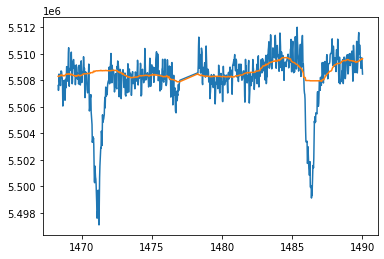

In [24]:
plt.plot(table['TIME'],table['PDCSAP_FLUX'])
plt.plot(table['TIME'],trend_flux)

In [84]:
from scipy.signal import savgol_filter, medfilt
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.coordinates import SkyCoord


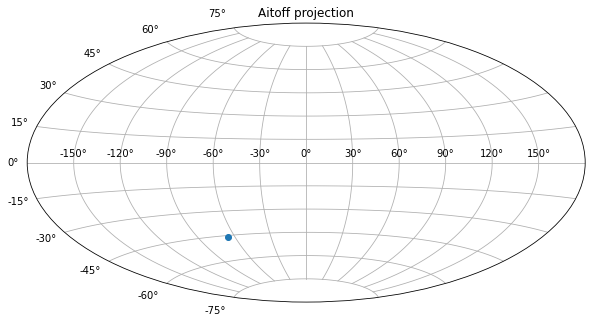

In [97]:
ra = info[-2] * u.degree
dec = info[-1] * u.degree
d = SkyCoord(ra=ra, dec=dec, frame='icrs')
plt.figure(figsize=(10,7))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection")
plt.grid(True)
plt.plot(ra, dec, 'o', alpha=2)
#plt.plot(ra_tot[0],dec_tot[0],'y', markersize=2, alpha=0.2)
#plt.subplots_adjust(top=0.65,bottom=0.0)
#plt.savefig('sky positions.png')

In [78]:
info

['TIC 270577175',
 270577175,
 3.69569993,
 6,
 3,
 3,
 86.8212165826392,
 -51.0665035714537]

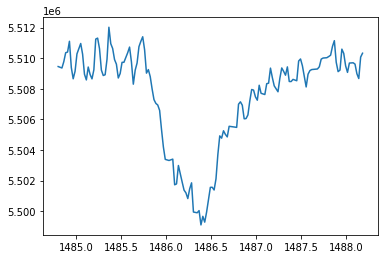

In [5]:
plt.plot(data['TIME'][720:882],data['PDCSAP_FLUX'][720:882])

In [6]:
test = data['PDCSAP_FLUX'][720:882]

In [7]:
data['PDCSAP_FLUX'][100:262] += test

In [8]:
import lightkurve as lk

In [101]:
lc = lk.search_lightcurve("Beta Pictoris", mission="TESS")
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,270577175,0.0
1,TESS Sector 04,2018,TESS-SPOC,1800,270577175,0.0
2,TESS Sector 04,2018,QLP,1800,270577175,0.0
3,TESS Sector 04,2018,TASOC,120,270577175,0.0
4,TESS Sector 04,2018,TASOC,1800,270577175,0.0
5,TESS Sector 05,2018,SPOC,120,270577175,0.0
6,TESS Sector 05,2018,TESS-SPOC,1800,270577175,0.0
7,TESS Sector 05,2018,QLP,1800,270577175,0.0
8,TESS Sector 05,2018,TASOC,120,270577175,0.0


In [10]:
data = lc[11].download()

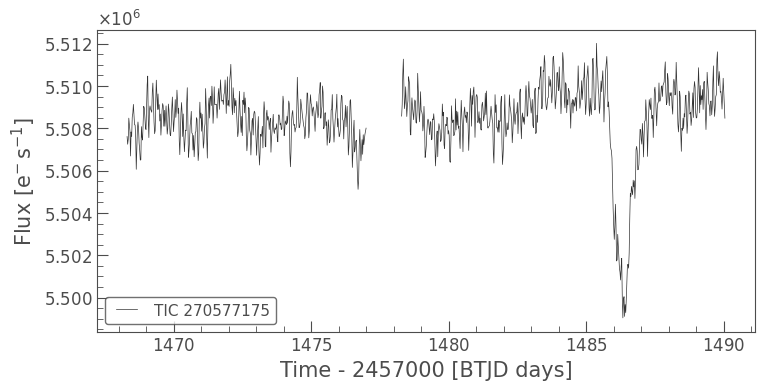

In [11]:
data.plot()

In [12]:
flattened = data.sap_flux.flatten()

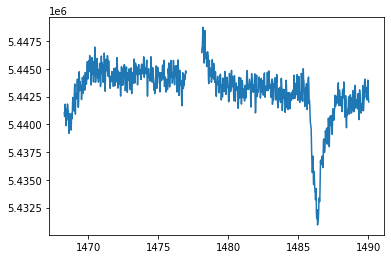

In [13]:
plt.plot(data.time.value,flattened.value)

In [22]:
test_data = data.flatten(window_length=121) 

<Figure size 1080x432 with 0 Axes>

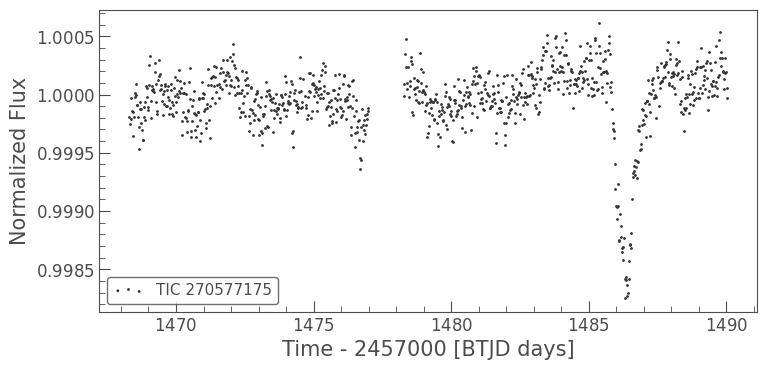

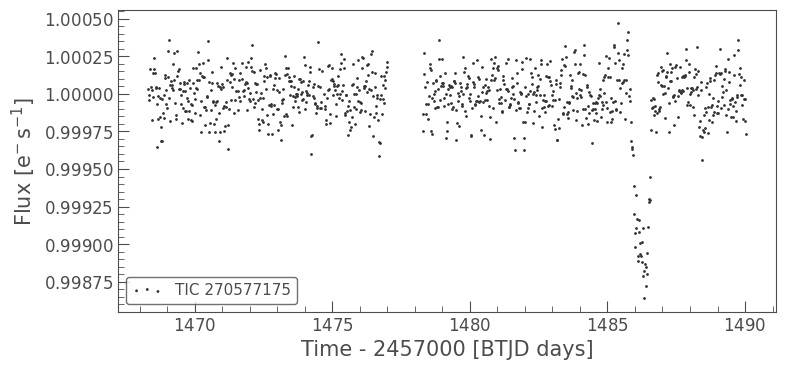

In [49]:
plt.figure(figsize=(15,6))
data.normalize().scatter()
test_data.scatter()

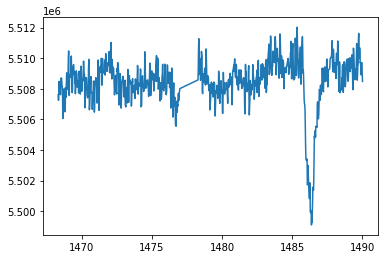

In [27]:
plt.plot(table['TIME'],table['PDCSAP_FLUX'])

In [42]:
from wotan import flatten
from scipy.signal import savgol_filter

In [43]:
flux = flatten(time=table['TIME'],flux=table['PDCSAP_FLUX'],method='savgol',window_length=121)
flux_sp = savgol_filter(table['PDCSAP_FLUX'],window_length=121,polyorder=2)

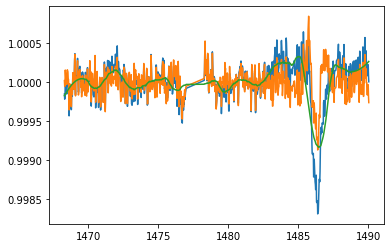

In [46]:
plt.plot(table['TIME'],normalise_flux(table['PDCSAP_FLUX'])+np.ones(len(table['PDCSAP_FLUX'])))
plt.plot(table['TIME'],flux)
plt.plot(table['TIME'],normalise_flux(flux_sp)+np.ones(len(flux_sp)))

---

In [57]:
aumic = lk.search_lightcurve("AU Mic",mission="TESS")
aumic = aumic[1].download()

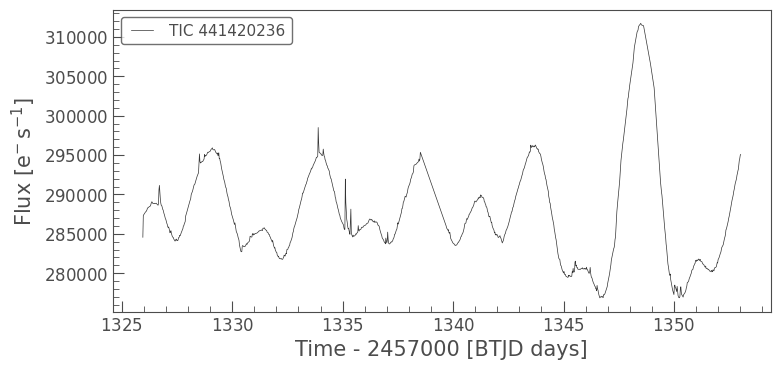

In [58]:
aumic.plot()

In [60]:
aumic_flat = aumic.flatten(window_length=121)

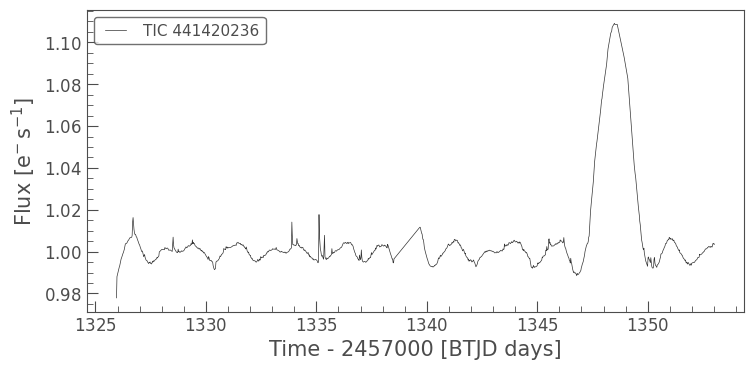

In [61]:
aumic_flat.plot()

---

In [62]:
from wotan import flatten

In [63]:
data = import_lightcurve("betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits")[0]

In [78]:
flux_flat = flatten(time=data['TIME'],flux=table['PDCSAP_FLUX'],method='median',window_length=2.5)

In [84]:
normalised = normalise_flux(table['PDCSAP_FLUX'])
flux_flat2,trend = flatten(time=data['TIME'],flux=normalised,method='median',window_length=2.5,return_trend=True)

In [85]:
flux_flat2 = flux_flat2 * trend

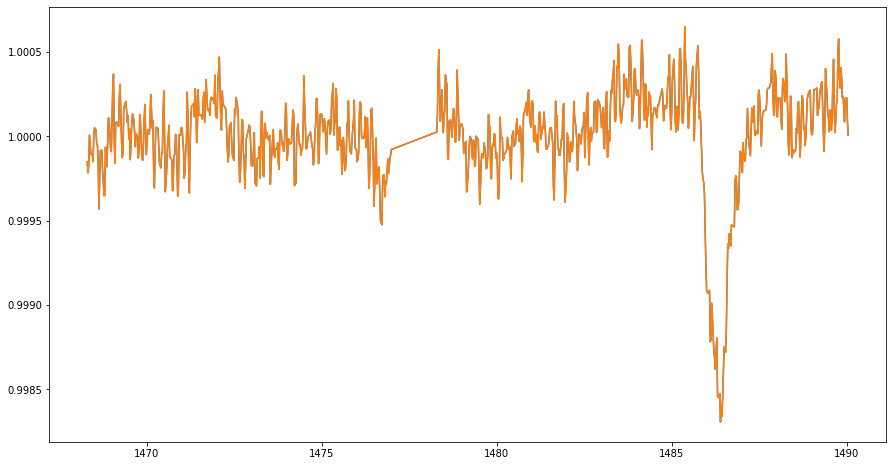

In [89]:
plt.figure(figsize=(15,8))
plt.plot(table['TIME'],normalise_flux(table['PDCSAP_FLUX'])+np.ones(len(table['PDCSAP_FLUX'])))
plt.plot(table['TIME'],flux_flat)
plt.plot(table['TIME'],flux_flat2+np.ones(len(flux_flat2)))

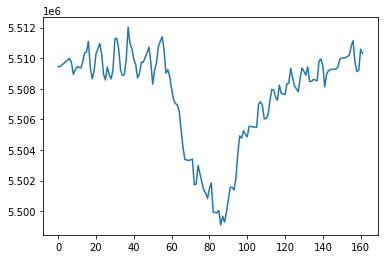

In [94]:
plt.plot(data['PDCSAP_FLUX'][710:710+162])

In [95]:
test = data['PDCSAP_FLUX'][710:710+162]

---

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [9]:
from analysis_tools_cython import *
from wotan import flatten

In [10]:
lc, _ = import_XRPlightcurve("betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl", sector=6)

In [28]:
data = get_output("output_log/test_betapic.txt")

In [29]:
data

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,transit_prob
0,hlsp_tess-spoc_tess_phot_0000000270577175-s000...,-25.162825,-5.935262,1486.262397,0.965025,0.287118,0.202394,0.624996,-0.001161,0.142491,0.57,maybeTransit
1,hlsp_tess-spoc_tess_phot_0000000270577175-s000...,-25.162825,-5.935262,1486.262397,1.044951,0.293286,0.258559,0.624996,-0.001161,0.142491,0.57,maybeTransit
2,hlsp_tess-spoc_tess_phot_0000000270577175-s000...,-25.162825,-5.935262,1486.262397,0.975901,0.281267,0.187681,0.624996,-0.001161,0.142491,0.57,maybeTransit
3,hlsp_tess-spoc_tess_phot_0000000270577175-s000...,-25.162825,-5.935262,1486.262397,1.006264,0.270420,0.233311,0.624996,-0.001161,0.142491,0.57,maybeTransit
4,hlsp_tess-spoc_tess_phot_0000000270577175-s000...,-25.162825,-5.935262,1486.262397,1.006264,0.270420,0.233311,0.624996,-0.001161,0.142491,0.57,maybeTransit


In [23]:
1 - 0.001161

0.998839